# Compare and Calculate climatology and anomaly of ERA5/GOES/MERRA2 net shortwave and sst

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import json
import gcsfs
from scipy.signal import detrend

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

era23 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/gom_updated.zarr'))
merra23 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/ocean.zarr'))
#goes_t = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOES/datasets/sw_ds.zarr'))

era1022 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/surf_ds_2010_22.zarr'))
merra_1022 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/ocean2010_2022.zarr'))

In [2]:
era_hrly = xr.concat([era1022, era23], dim='time')
merra_hrly = xr.concat([merra_1022, merra23], dim='time')

In [3]:
era_hrly

<xarray.Dataset> Size: 31GB
Dimensions:    (latitude: 41, longitude: 113, time: 120437)
Coordinates:
  * latitude   (latitude) float32 164B 21.0 21.25 21.5 21.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 963kB 2010-01-01 ... 2023-09-28T04:00:00
Data variables:
    slhf       (time, latitude, longitude) float64 4GB dask.array<chunksize=(2374, 11, 29), meta=np.ndarray>
    sshf       (time, latitude, longitude) float64 4GB dask.array<chunksize=(2374, 11, 29), meta=np.ndarray>
    ssr        (time, latitude, longitude) float64 4GB dask.array<chunksize=(2374, 11, 29), meta=np.ndarray>
    sst        (time, latitude, longitude) float64 4GB dask.array<chunksize=(2374, 11, 29), meta=np.ndarray>
    str        (time, latitude, longitude) float64 4GB dask.array<chunksize=(2374, 11, 29), meta=np.ndarray>
    ssrd       (time, latitude, longitude) float64 4GB dask.array<chunksize=(115574, 11, 29), meta=np.ndarray>
    strd       (time, latitude, longitude) float64 4GB dask.array<chunksize=(115574, 11, 29), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-21 17:02:34 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
merra_hrly

<xarray.Dataset> Size: 2GB
Dimensions:   (lat: 21, lon: 45, time: 121248)
Coordinates:
  * lat       (lat) float64 168B 21.0 21.5 22.0 22.5 ... 29.5 30.0 30.5 31.0
  * lon       (lon) float64 360B -100.0 -99.38 -98.75 ... -73.75 -73.12 -72.5
  * time      (time) datetime64[ns] 970kB 2010-01-01T00:30:00 ... 2023-10-31T...
Data variables:
    EFLUXWTR  (time, lat, lon) float32 458MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    HFLUXWTR  (time, lat, lon) float32 458MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    LWGNTWTR  (time, lat, lon) float32 458MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    SWGNTWTR  (time, lat, lon) float32 458MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
    TSKINWTR  (time, lat, lon) float32 458MB dask.array<chunksize=(14244, 3, 12), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    CDO:                               Climate Data Operators version 1.9.8 (...
    Comment:                           GMAO filename: d5124_m2_jan00.tavg1_2d...
    Contact:                           http://gmao.gsfc.nasa.gov
    Conventions:                       CF-1
    DataResolution:                    0.5 x 0.625
    ...                                ...
    Title:                             MERRA2 tavg1_2d_ocn_Nx: 2d,1-Hourly,Ti...
    VersionID:                         5.12.4
    WesternmostLongitude:              -180.0
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    identifier_product_doi:            10.5067/Y67YQ1L3ZZ4R
    identifier_product_doi_authority:  http://dx.doi.org/

## Shortwave

In [6]:
## convert from J/m^2 -> W/m^2
era_wm2 = era_hrly / (60*60)
#resample to daily freq (hourly too noisy
era = era_wm2.resample(time='D').mean('time')
merra = merra_hrly.sel(time=slice('2010', '2023-09-28')).resample(time='D').mean('time')
merra['EFLUXWTR'] = (-merra.EFLUXWTR)
merra['HFLUXWTR'] = (-merra.HFLUXWTR)

In [7]:
era.load()

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 5019, latitude: 41, longitude: 113)
Coordinates:
  * latitude   (latitude) float32 164B 21.0 21.25 21.5 21.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 40kB 2010-01-01 2010-01-02 ... 2023-09-28
Data variables:
    slhf       (time, latitude, longitude) float64 186MB -14.05 -18.46 ... nan
    sshf       (time, latitude, longitude) float64 186MB -41.33 ... -7.208
    ssr        (time, latitude, longitude) float64 186MB 69.84 68.71 ... nan nan
    sst        (time, latitude, longitude) float64 186MB nan nan nan ... nan nan
    str        (time, latitude, longitude) float64 186MB -40.41 ... -31.47
    ssrd       (time, latitude, longitude) float64 186MB nan nan nan ... 0.0 0.0
    strd       (time, latitude, longitude) float64 186MB nan nan ... 426.9 425.2
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-21 17:02:34 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [8]:
merra = merra.chunk({'lat':-1, 'lon':-1}).load()

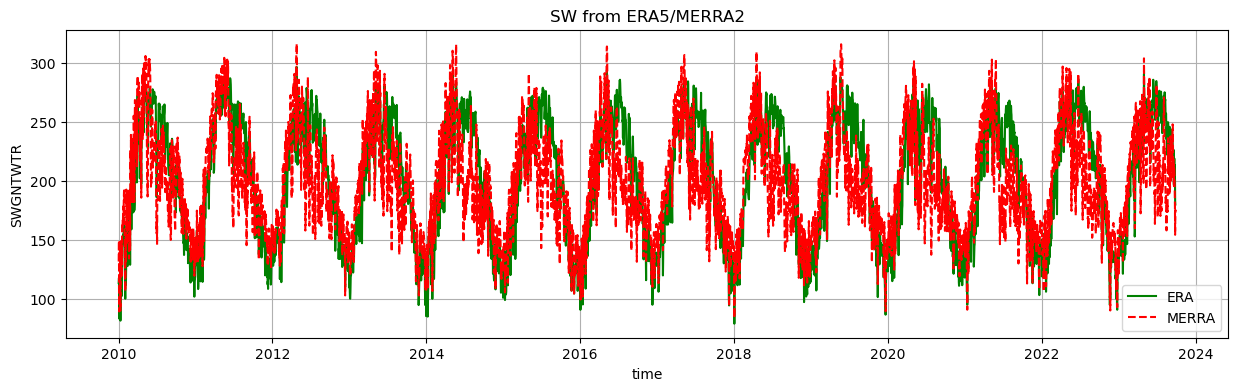

In [9]:
era.ssr.mean(['latitude', 'longitude']).plot(figsize=(15,4), color='green', label='ERA')
#sw_goes.sel(time=slice('2023-01-01', '2023-09-30')).mean(['lat', 'lon']).plot(color='silver', label='GOES')
merra.SWGNTWTR.mean(['lat', 'lon']).plot(color='red', linestyle='--',label='MERRA')
plt.grid()
plt.legend()
plt.title('SW from ERA5/MERRA2');

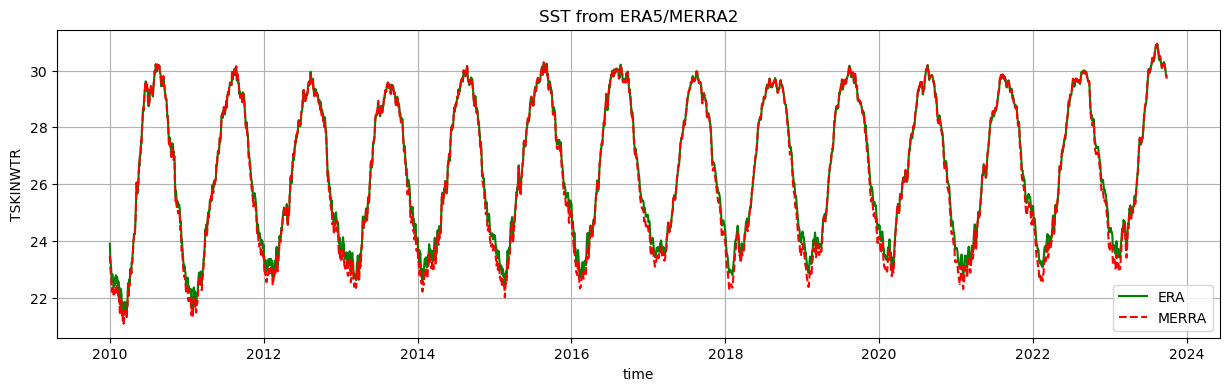

In [10]:
(era_hrly.sst-273.15).resample(time='D').mean().mean(['latitude', 'longitude']).plot(figsize=(15,4), color='green', label='ERA')
#sw_goes.sel(time=slice('2023-01-01', '2023-09-30')).mean(['lat', 'lon']).plot(color='silver', label='GOES')
(merra.TSKINWTR-273.15).mean(['lat', 'lon']).plot(color='red', linestyle='--',label='MERRA')
plt.grid()
plt.legend()
plt.title('SST from ERA5/MERRA2');

In [11]:
mo_clim_e = era.groupby('time.month').mean(['time', 'latitude', 'longitude'])
mo_anom_e = era.groupby('time.month') - mo_clim_e

#mo_clim_m = (sw_merra).groupby('time.month').mean(['time', 'latitude', 'longitude'])
#mo_anom_m = (sw_merra).groupby('time.month') - mo_clim_m

mo_clim_m = merra.groupby('time.month').mean(['time', 'lat', 'lon'])
mo_anom_m = merra.groupby('time.month') - mo_clim_m

In [12]:
def plot_clims(da_e, da_m, fig_title):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

    mo_clim_e[f'{da_e}'].plot(ax=ax0, label='ERA')
    mo_clim_m[f'{da_m}'].plot(ax=ax0, label='MERRA')
    ax0.set_title('monthly climatology')
    ax0.grid()
    ax0.legend()
    
    mo_anom_e[f'{da_e}'].mean(['latitude', 'longitude']).plot(label='ERA', ax=ax1)
    mo_anom_m[f'{da_m}'].mean(['lat', 'lon']).plot(ax=ax1, label='MERRA', linestyle='--')
    ax1.set_title('monthly anomaly')
    ax1.grid()
    ax1.legend()
    
    plt.tight_layout()
    plt.suptitle(f'{fig_title}', y=1.05);

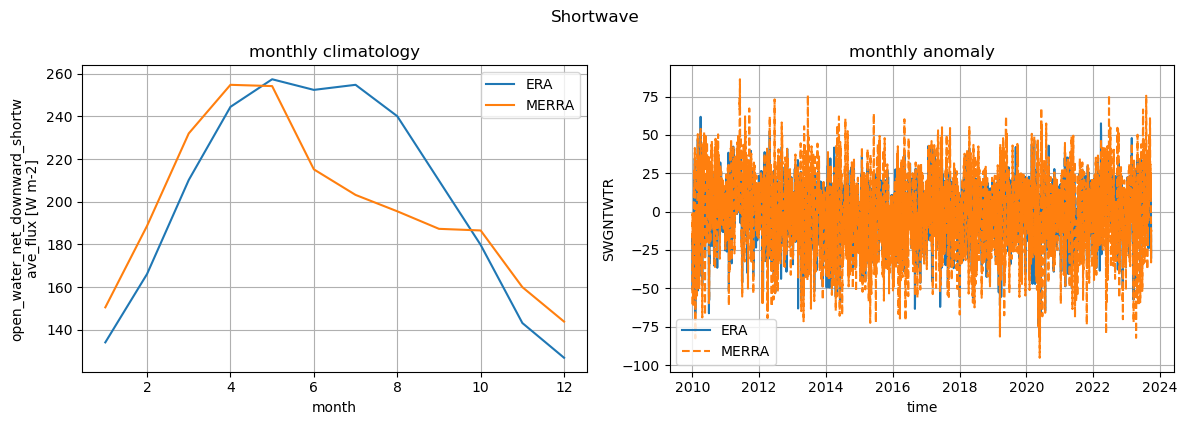

In [13]:
plot_clims('ssr', 'SWGNTWTR', 'Shortwave')

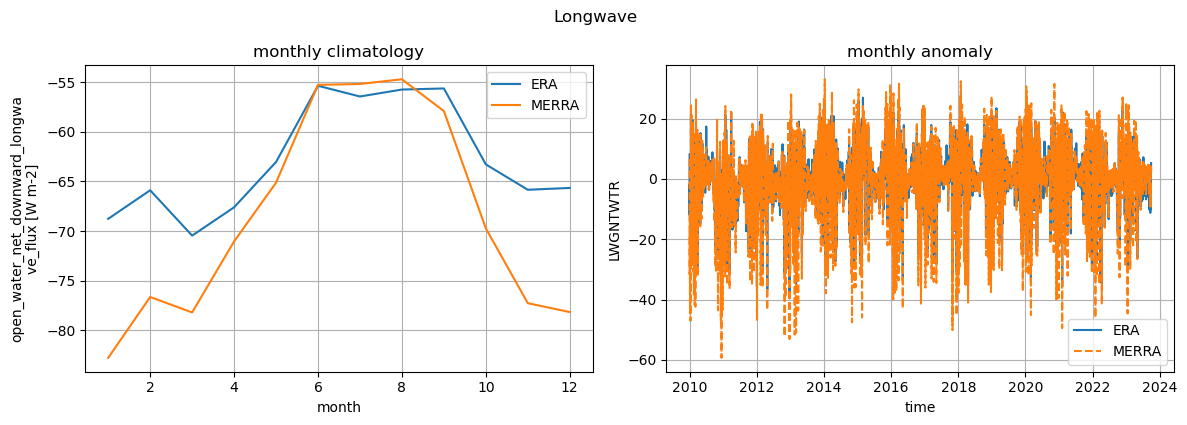

In [14]:
plot_clims('str', 'LWGNTWTR', 'Longwave')

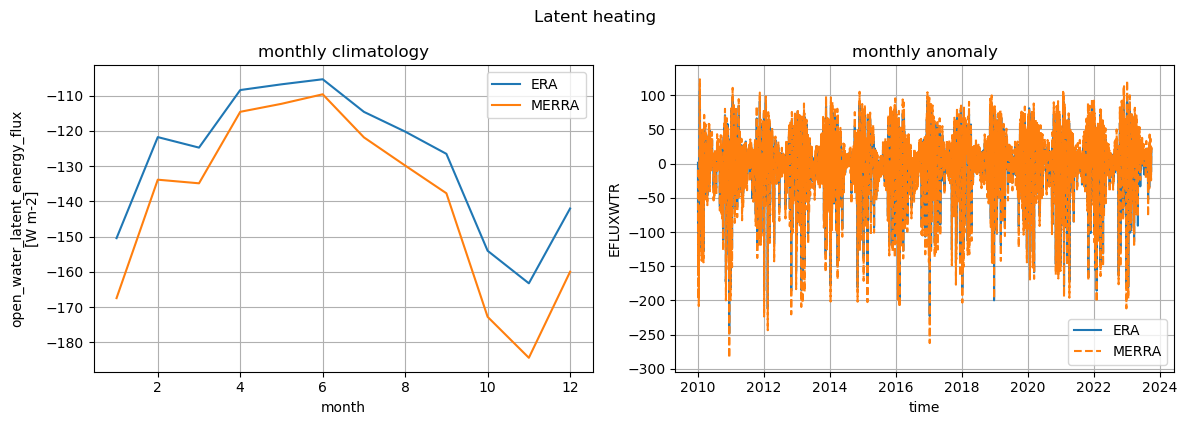

In [15]:
plot_clims('slhf', 'EFLUXWTR', 'Latent heating')

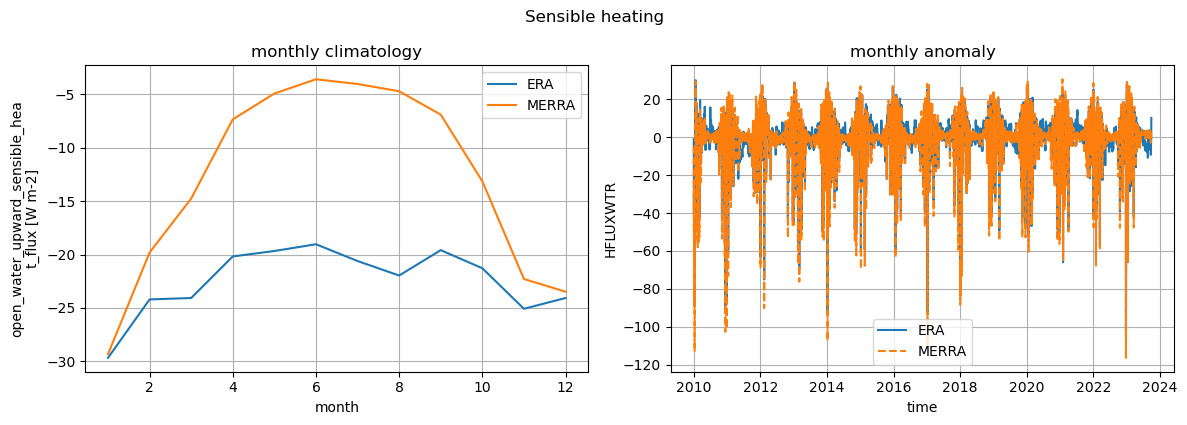

In [16]:
plot_clims('sshf', 'HFLUXWTR', 'Sensible heating')

## Detrended Shortwave

In [75]:
sw_detrend_e = xr.apply_ufunc(detrend, sw.fillna(0.).chunk({'time':-1}), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[sw.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [76]:
sw_detrend_g = xr.apply_ufunc(detrend, sw_goes.fillna(0.).chunk({'time':-1}), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[sw.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [77]:
sw_detrend_e

<xarray.DataArray 'ssr' (latitude: 37, longitude: 113, time: 8717)>
dask.array<transpose, shape=(37, 113, 8717), dtype=float32, chunksize=(37, 113, 8717), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.0 22.25 22.5 22.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -72.5 -72.25 -72.0
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2023-11-12

In [78]:
sw_detrend_g

<xarray.DataArray 'DSR' (lat: 18, lon: 56, time: 1584)>
dask.array<transpose, shape=(18, 56, 1584), dtype=float32, chunksize=(18, 56, 1584), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 30.75 30.25 29.75 29.25 ... 23.75 23.25 22.75 22.25
  * lon      (lon) float64 -99.75 -99.25 -98.75 -98.25 ... -73.25 -72.75 -72.25
  * time     (time) datetime64[ns] 2019-12-05 2019-12-06 ... 2024-04-05

In [80]:
mo_clim_sw_d = sw_detrend_e.groupby('time.month').mean(['time'])
mo_anom_sw_d = sw_detrend_e.groupby('time.month') - mo_clim_sw_d

mo_clim_sw_d_g = sw_detrend_g.groupby('time.month').mean(['time'])
mo_anom_sw_d_g = sw_detrend_g.groupby('time.month') - mo_clim_sw_d_g

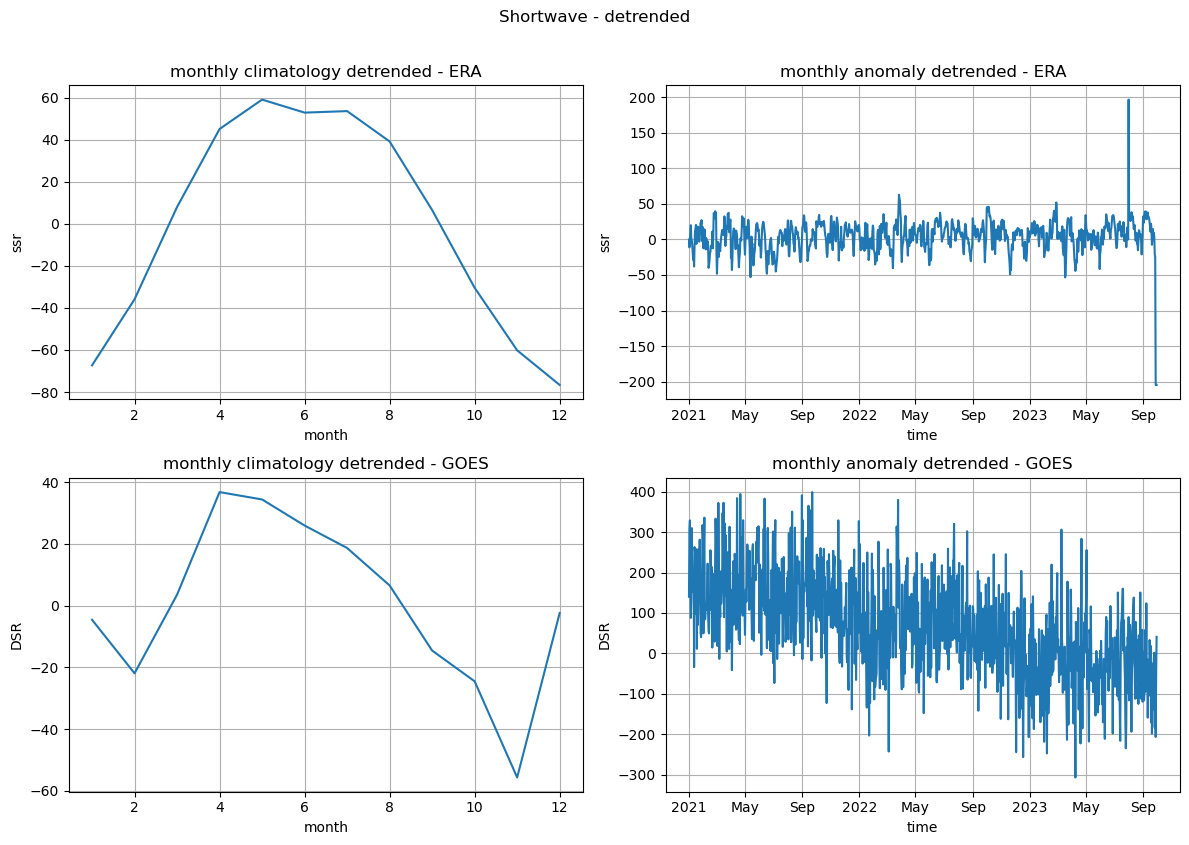

In [82]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

mo_clim_sw_d.mean(['latitude', 'longitude']).plot(ax=ax[0,0])
ax[0,0].set_title('monthly climatology detrended - ERA')
ax[0,0].grid()
mo_anom_sw_d.sel(time=slice('2021', '2023-09-30')).mean(['latitude', 'longitude']).plot(ax=ax[0,1])
ax[0,1].set_title('monthly anomaly detrended - ERA')
ax[0,1].grid()

mo_clim_sw_d_g.mean(['lat', 'lon']).plot(ax=ax[1,0])
ax[1,0].set_title('monthly climatology detrended - GOES')
ax[1,0].grid()
mo_anom_sw_d_g.sel(time=slice('2021', '2023-09-30')).mean(['lat', 'lon']).plot(ax=ax[1,1])
ax[1,1].set_title('monthly anomaly detrended - GOES')
ax[1,1].grid()

plt.tight_layout()
plt.suptitle('Shortwave - detrended', y=1.05);

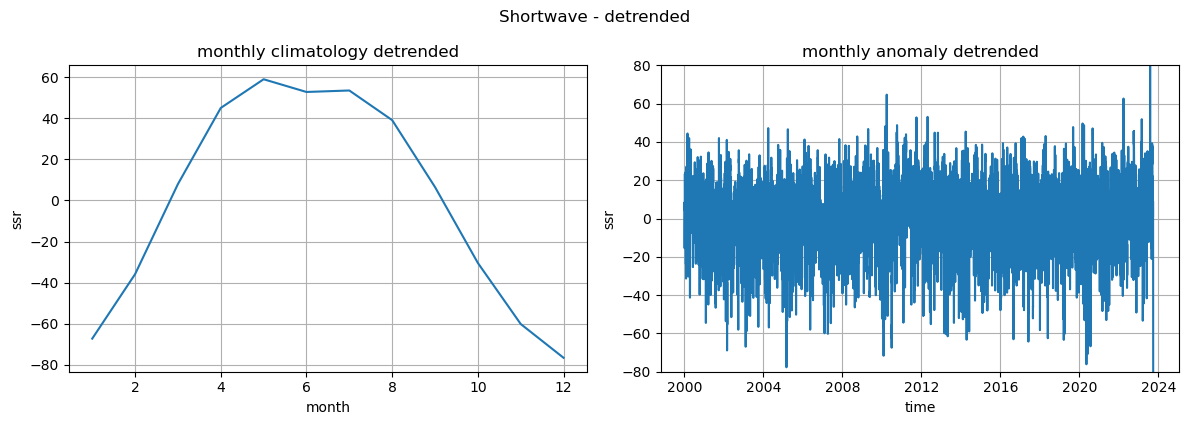

In [40]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

mo_clim_sw_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('monthly climatology detrended')
ax0.grid()
mo_anom_sw_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly detrended')
ax1.grid()
ax1.set_ylim(-80,80)
plt.tight_layout()
plt.suptitle('Shortwave - detrended', y=1.05);

In [14]:
yr_clim_sw_d = sw_detrend_ufunc.groupby('time.year').mean(['time'])
yr_anom_sw_d = sw_detrend_ufunc.groupby('time.year') - yr_clim_sw_d

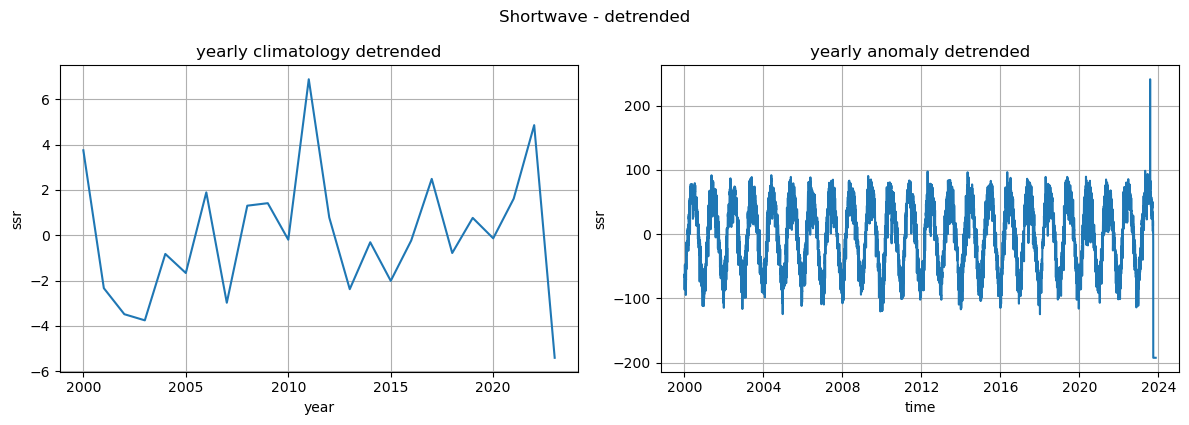

In [15]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

yr_clim_sw_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('yearly climatology detrended')
ax0.grid()
yr_anom_sw_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('Shortwave - detrended', y=1.05);

## SST

In [16]:
#convert to ˚C and resample to daily freq (hourly too noisy)
sst = (ds.sst-273.15).resample(time='D').mean('time')

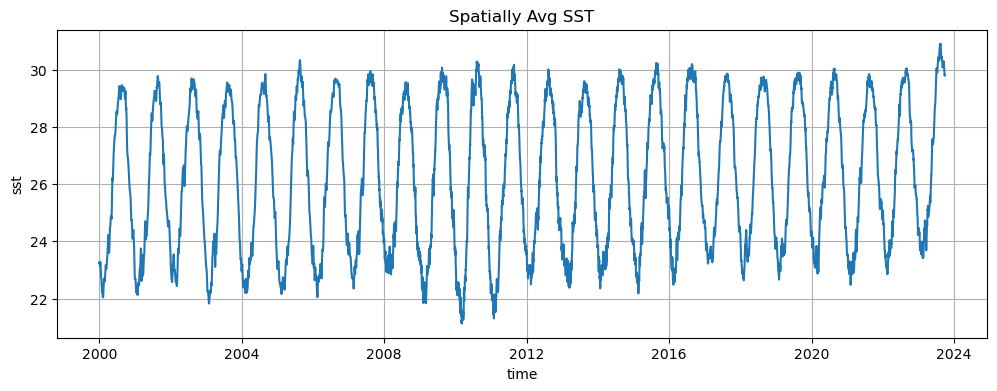

In [17]:
sst.mean(['latitude', 'longitude']).plot(figsize=(12,4))
plt.grid()
plt.title('Spatially Avg SST');

In [18]:
mo_clim_sst = sst.groupby('time.month').mean(['time', 'latitude', 'longitude'])
mo_anom_sst = sst.groupby('time.month') - mo_clim_sst

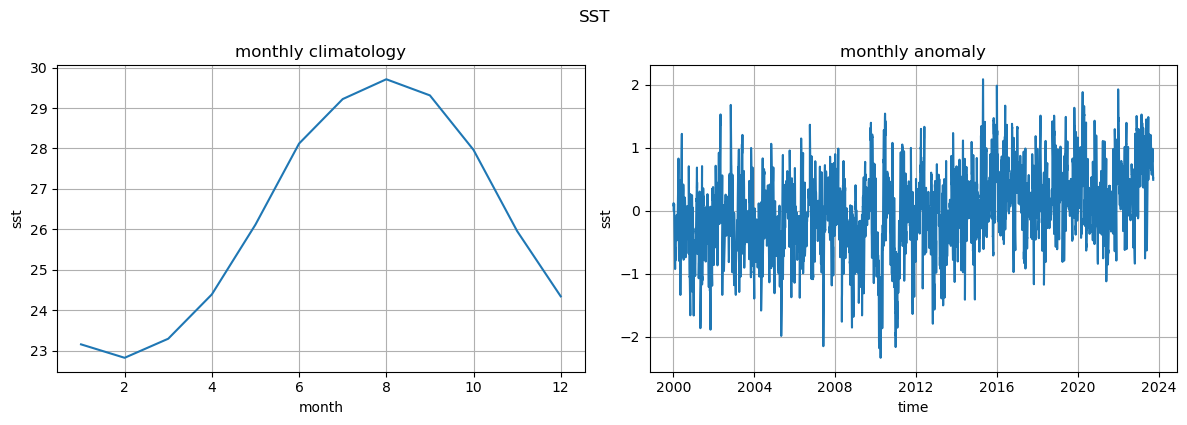

In [19]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

mo_clim_sst.plot(ax=ax0)
ax0.set_title('monthly climatology')
ax0.grid()
mo_anom_sst.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST', y=1.05);

In [20]:
yr_clim_sst = sst.groupby('time.year').mean(['time', 'latitude', 'longitude'])
yr_anom_sst = sst.groupby('time.year') - yr_clim_sst

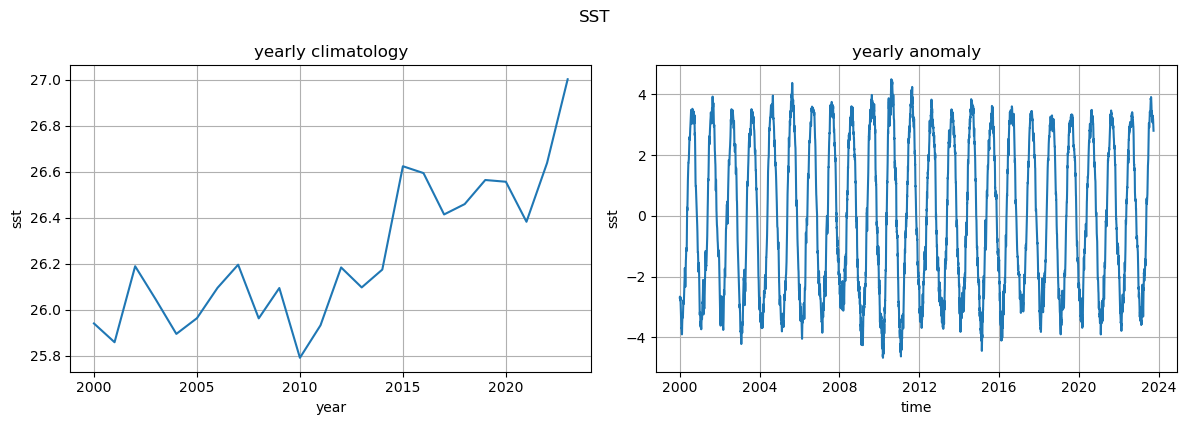

In [21]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

yr_clim_sst.plot(ax=ax0)
ax0.set_title('yearly climatology')
ax0.grid()
yr_anom_sst.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST', y=1.05);

## Detrended SST

In [22]:
sst_detrend_ufunc = xr.apply_ufunc(detrend, sst.fillna(0.).chunk({'time':-1}), kwargs=dict(axis=-1),
                                   input_core_dims=[['time']],
                                   output_core_dims=[['time']],
                                   output_dtypes=[sst.dtype],
                                   dask='parallelized').reset_coords(drop=True)

In [23]:
sst_detrend_ufunc

<xarray.DataArray 'sst' (latitude: 37, longitude: 113, time: 8717)>
dask.array<transpose, shape=(37, 113, 8717), dtype=float32, chunksize=(37, 113, 8717), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.0 22.25 22.5 22.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -72.5 -72.25 -72.0
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2023-11-12

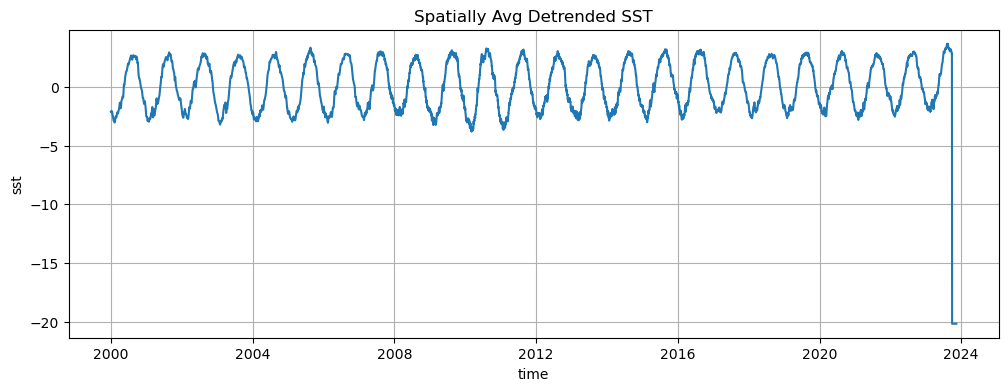

In [31]:
sst_detrend_ufunc.mean(['latitude', 'longitude']).plot(figsize=(12,4))
plt.grid()
plt.title('Spatially Avg Detrended SST');

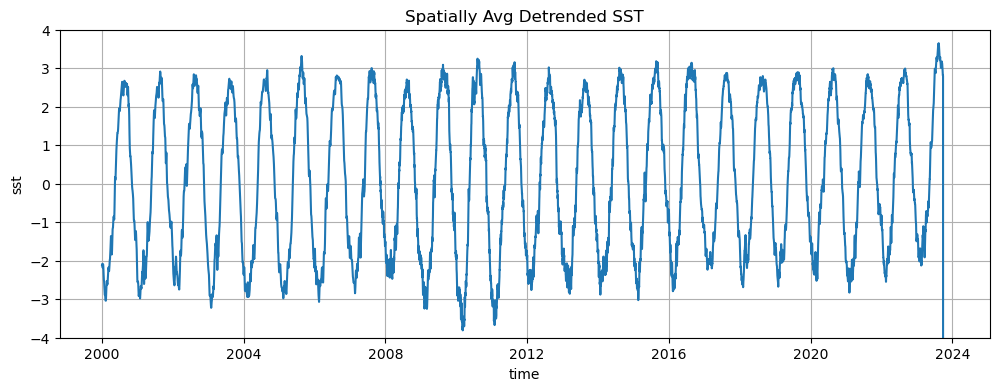

In [36]:
sst_detrend_ufunc.mean(['latitude', 'longitude']).plot(figsize=(12,4))
plt.grid()
plt.title('Spatially Avg Detrended SST')
plt.ylim(-4,4);

In [24]:
mo_clim_sst_d = sst_detrend_ufunc.groupby('time.month').mean(['time'])
mo_anom_sst_d = sst_detrend_ufunc.groupby('time.month') - mo_clim_sst_d

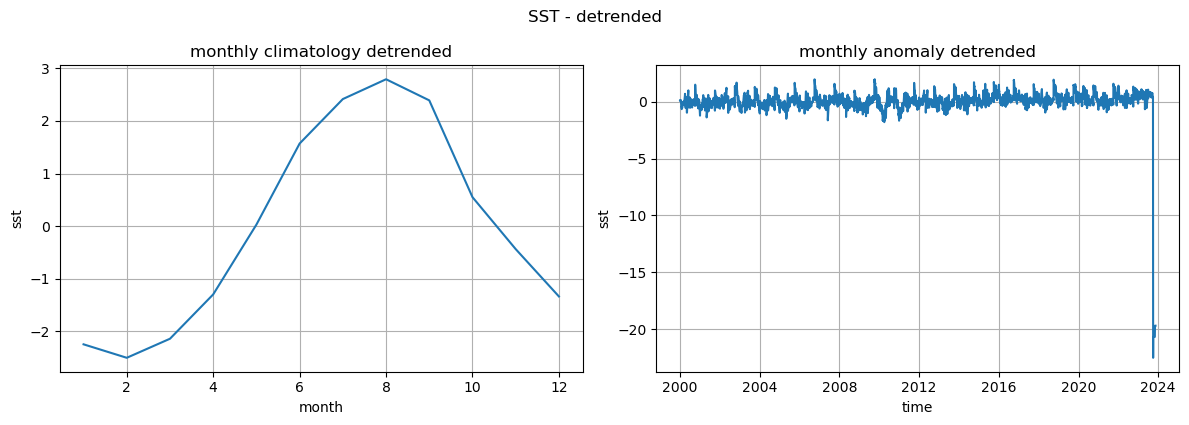

In [25]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

mo_clim_sst_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('monthly climatology detrended')
ax0.grid()
mo_anom_sst_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST - detrended', y=1.05);

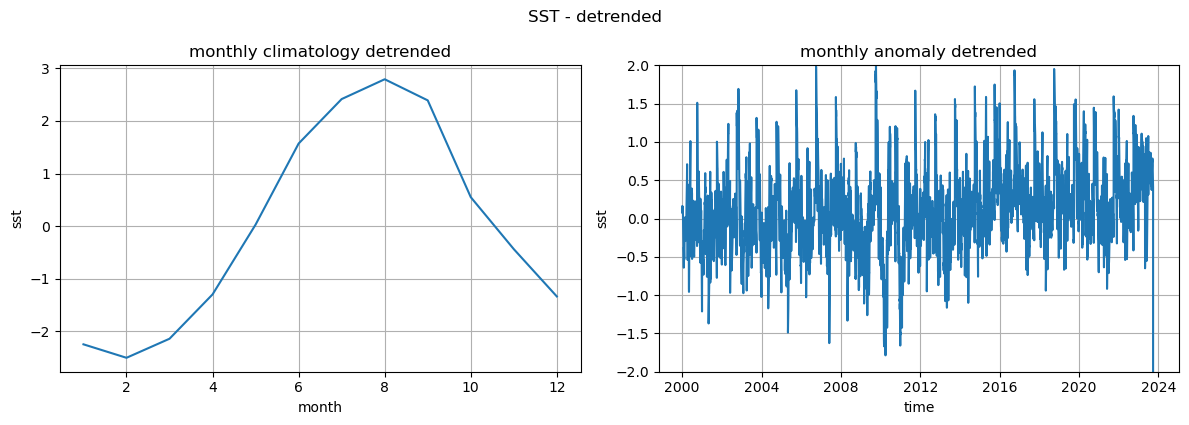

In [34]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

mo_clim_sst_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('monthly climatology detrended')
ax0.grid()
mo_anom_sst_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('monthly anomaly detrended')
ax1.grid()
ax1.set_ylim(-2, 2)
plt.tight_layout()
plt.suptitle('SST - detrended', y=1.05);

In [26]:
yr_clim_sst_d = sst_detrend_ufunc.groupby('time.year').mean(['time'])
yr_anom_sst_d = sst_detrend_ufunc.groupby('time.year') - yr_clim_sst_d

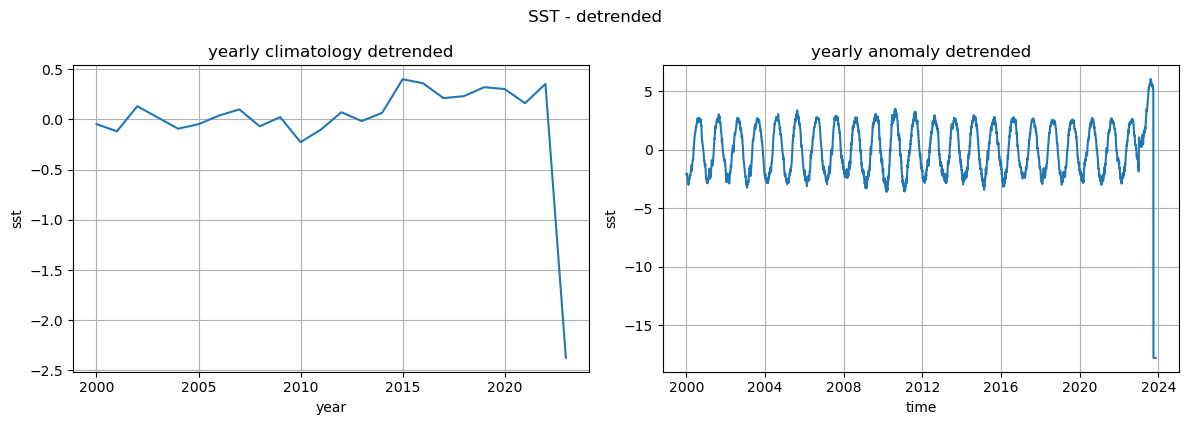

In [32]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

yr_clim_sst_d.mean(['latitude', 'longitude']).plot(ax=ax0)
ax0.set_title('yearly climatology detrended')
ax0.grid()
yr_anom_sst_d.mean(['latitude', 'longitude']).plot(ax=ax1)
ax1.set_title('yearly anomaly detrended')
ax1.grid()
plt.tight_layout()
plt.suptitle('SST - detrended', y=1.05);